# Importing Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def load_data(file_path):
	if file_path.endswith('.csv'):
		return pd.read_csv(file_path)
	elif file_path.endswith('.xlsx'):
		return pd.read_excel(file_path)
	elif file_path.endswith('.sql'):
		return pd.read_sql(file_path)
		pass
	else:
		raise ValueError("Unsupported file format")

## loading the data

In [3]:
file_name = input('Enter name file with path: ')
df= load_data(file_name)

# Explore & Preprocessing Data

In [4]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8,HUTB-002062
1,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13,HUTB005057
2,41952,Rental unit in Barcelona · ★4.35 · 2 bedrooms ...,183340,Teresa,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,66,2023-05-26,0.49,5,269,22,HUTB-003549
3,32711,Rental unit in Barcelona · ★4.43 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,186,2,91,2023-03-22,0.63,3,256,24,HUTB-001722
4,46153,Rental unit in Barcelona · ★4.20 · 2 bedrooms ...,90417,Etain (Marnie),Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.389560,2.177590,Entire home/apt,63,31,5,2022-07-31,0.03,2,176,1,Exempt
5,49968,Rental unit in Barcelona · ★4.56 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405700,2.170160,Entire home/apt,203,1,76,2023-06-06,0.53,3,257,23,HUTB-001723
6,71520,Rental unit in Barcelona · 3 bedrooms · 5 beds...,366428,Ariadna,Gràcia,Vallcarca i els Penitents,41.418410,2.133070,Entire home/apt,250,5,1,2011-06-23,0.01,1,57,0,HUTB-007966
7,71553,Rental unit in Barcelona · ★4.20 · 1 bedroom ·...,366654,Watermelon Barcelona Apartments,Eixample,la Dreta de l'Eixample,41.397050,2.174690,Entire home/apt,186,3,78,2023-05-06,0.52,4,136,11,HUTB-002424
8,71736,Rental unit in Barcelona · ★4.0 · 4 bedrooms ·...,368317,Nacharosa,Ciutat Vella,el Raval,41.381740,2.166630,Entire home/apt,68,28,11,2016-07-14,0.07,7,344,0,NaN
9,34981,Rental unit in Barcelona · ★4.52 · 4 bedrooms ...,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.176230,Entire home/apt,460,5,205,2023-06-07,1.33,1,0,30,HUTB-150671


## check num of rows & columns

In [5]:
df.shape

(17230, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17230 entries, 0 to 17229
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              17230 non-null  int64  
 1   name                            17230 non-null  object 
 2   host_id                         17230 non-null  int64  
 3   host_name                       17228 non-null  object 
 4   neighbourhood_group             17230 non-null  object 
 5   neighbourhood                   17230 non-null  object 
 6   latitude                        17230 non-null  float64
 7   longitude                       17230 non-null  float64
 8   room_type                       17230 non-null  object 
 9   price                           17230 non-null  int64  
 10  minimum_nights                  17230 non-null  int64  
 11  number_of_reviews               17230 non-null  int64  
 12  last_review                     

summary of statistics

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.723000e+04,1.723000e+04,17230.000000,17230.000000,17230.000000,17230.000000,17230.000000,13198.000000,17230.000000,17230.000000,17230.000000
mean,2.452457e+17,1.577106e+08,41.391854,2.167149,177.689959,14.375218,42.310215,1.438544,28.073244,172.454208,11.988799
std,3.583623e+17,1.652453e+08,0.013882,0.017245,876.724391,33.905670,83.509961,1.839384,53.164134,124.998430,23.295948
min,1.867400e+04,3.073000e+03,41.352608,2.091590,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.043217e+07,9.536735e+06,41.381040,2.157150,55.000000,1.000000,1.000000,0.230000,1.000000,56.000000,0.000000
50%,4.215769e+07,8.489767e+07,41.389566,2.168260,111.000000,3.000000,7.000000,0.870000,5.000000,171.000000,2.000000
75%,6.601314e+17,2.871165e+08,41.401190,2.177500,214.000000,31.000000,43.000000,2.100000,25.000000,293.000000,16.000000
max,9.100075e+17,5.185810e+08,41.459560,2.227710,90000.000000,1125.000000,1751.000000,50.640000,265.000000,365.000000,768.000000


In [8]:
df.describe(include=['object','bool'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license
count,17230,17228,17230,17230,17230,13198,8862
unique,6184,3261,10,70,4,1632,5333
top,Rental unit in Barcelona · 1 bedroom · 1 bed ·...,Ukio,Eixample,la Dreta de l'Eixample,Entire home/apt,2023-06-05,Exempt
freq,652,265,6244,2213,10262,477,1929


### check NULLs

In [9]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4032
reviews_per_month                 4032
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           8368
dtype: int64

In [10]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

In [11]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4032
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           8368
dtype: int64

### check duplicates

In [12]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [14]:
df = df.drop(['id','name',"last_review","license","host_name","host_id"],axis = 1)

In [15]:
#df.hist(figsize=(15,20))
#plt.show()

### comparison between different room types

Entire home/apt    10262
Private room        6675
Shared room          150
Hotel room           143
Name: room_type, dtype: int64


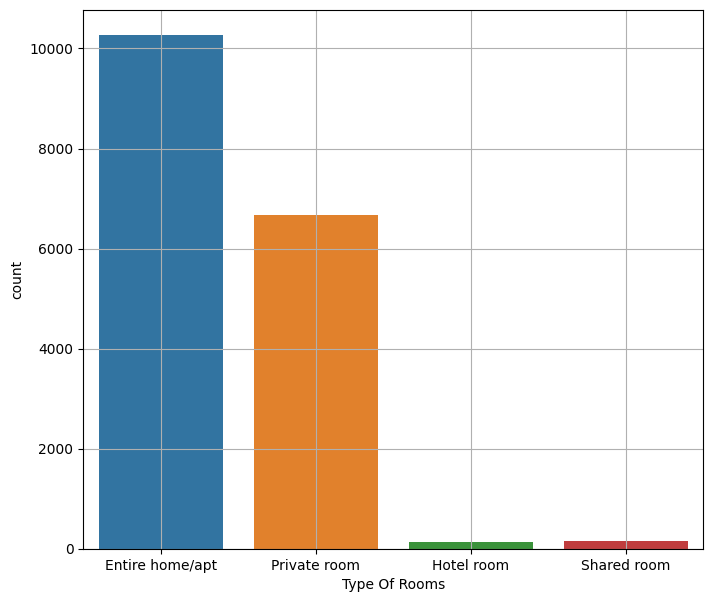

In [16]:
print(df['room_type'].value_counts()) 
plt.figure(figsize=(8,7))
sns.countplot(x='room_type',data=df)
plt.xlabel('Type Of Rooms')
plt.grid(True)
plt.show()

This visualization shows that Entire home are most type of rooms in barcelona

In [17]:
df.neighbourhood_group.unique()

array(['Eixample', 'Sant Martí', 'Gràcia', 'Ciutat Vella', 'Sant Andreu',
       'Sarrià-Sant Gervasi', 'Sants-Montjuïc', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris'], dtype=object)

C:\Users\milan\AppData\Local\Temp\ipykernel_27720\83291549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reviews_per_month'])


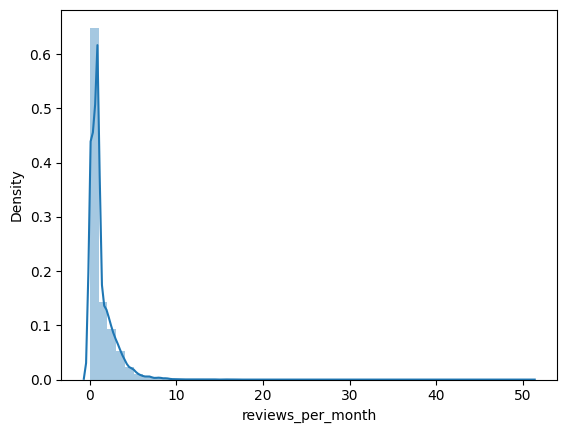

In [18]:
sns.distplot(df['reviews_per_month'])
plt.show()

We conclude that most reviews per month are between 0 to 7

price for each room type

<AxesSubplot: xlabel='room_type', ylabel='price'>

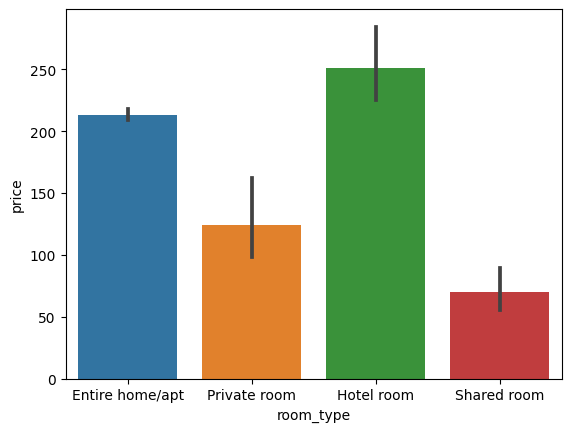

In [19]:
sns.barplot(x='room_type', y='price', data=df)

### Show Availability of Rooms based on Latitude and Longitude

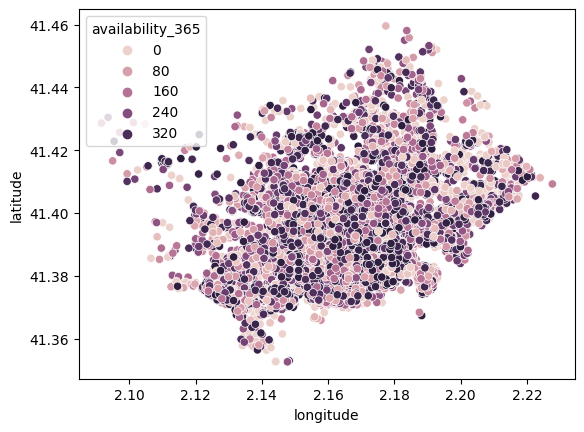

<Figure size 2000x1500 with 0 Axes>

In [20]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365')
plt.figure(figsize=(20, 15))
plt.show()

this visualize the number of available of rooms in different neighbourhood groups around barcelona city

### Compare Prices between all room types

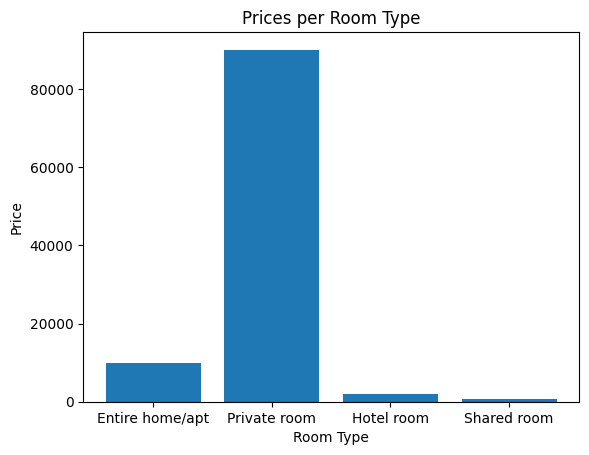

In [21]:
plt.bar(df['room_type'],df['price'])
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Prices per Room Type')
plt.show()

We conclude that private room are the most expensive type room in barcelona

## Handle Skewed Values

In [22]:
from scipy.stats import skew

# Set float display format to show values up to 4 decimal places
pd.options.display.float_format = '{:,.4f}'.format

# Calculate skewness in percentage (0-100) for each numerical column
sk_df = pd.DataFrame([{
    'column': c,
    'uniq': df[c].nunique(),  # Number of unique values in the column
    'skewness': (skew(df[c].dropna()) * 100)  # **if df[c].std() > 1e-5 else 0** # Skewness in percentage (0-100)
} for c in df.select_dtypes(include=['float', 'int']).columns])

# Sort the skewness DataFrame by skewness values in descending order
sk_df = sk_df.sort_values('skewness', ascending=False)

# Display the result
print(sk_df)

                           column  uniq   skewness
2                           price   787 8,023.3491
3                  minimum_nights    89 2,009.4663
8           number_of_reviews_ltm   174   770.9478
5               reviews_per_month   774   653.8871
4               number_of_reviews   512   383.0018
6  calculated_host_listings_count    66   270.3894
0                        latitude  8114    81.1616
7                availability_365   366     1.1476
1                       longitude  8942   -13.1898


In [23]:
import numpy as np
import pandas as pd
from scipy.stats import skew

# Assuming df is your DataFrame and skew_df is the DataFrame containing skewness information

# Apply transformations to reduce skewness
for col in df.select_dtypes(include=['float', 'int']).columns:
    col_skewness = skew(df[col].dropna())
    if col_skewness > 1:  # High positive skewness
        df[col] = np.log1p(df[col])
    elif col_skewness < -1:  # High negative skewness
        df[col] = np.expm1(df[col])

# Recalculate skewness to check improvements
new_skewness = df.select_dtypes(include=['float', 'int']).apply(lambda x: skew(x.dropna()))
print("New skewness after transformations:")
print(new_skewness.sort_values(ascending=False))

New skewness after transformations:
reviews_per_month                 0.8862
latitude                          0.8116
calculated_host_listings_count    0.7106
minimum_nights                    0.5271
number_of_reviews_ltm             0.4533
number_of_reviews                 0.3035
price                             0.1713
availability_365                  0.0115
longitude                        -0.1319
dtype: float64


In [24]:
# Define high skewness threshold
high_skewness_threshold = 10

# Identify columns to drop based on skewness threshold
cols_to_drop_high_skewness = new_skewness[new_skewness > high_skewness_threshold].index

# Identify columns to drop with NaNs in skewness
cols_to_drop_nan_skewness = new_skewness[new_skewness.isna()].index

# Combine lists of columns to drop
cols_to_drop = set(cols_to_drop_high_skewness).union(cols_to_drop_nan_skewness)

# Drop columns from DataFrame with error handling
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Recalculate skewness for the remaining columns
final_skewness = df.select_dtypes(include=['float', 'int']).apply(lambda x: skew(x.dropna()))

# Filter out negative skewness values
positive_skewness = final_skewness[final_skewness > 0]

# Print the positive skewness values only
print("\nFinal positive skewness after dropping columns:")
print(positive_skewness.sort_values(ascending=False))


Final positive skewness after dropping columns:
reviews_per_month                0.8862
latitude                         0.8116
calculated_host_listings_count   0.7106
minimum_nights                   0.5271
number_of_reviews_ltm            0.4533
number_of_reviews                0.3035
price                            0.1713
availability_365                 0.0115
dtype: float64


In [25]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Eixample,la Sagrada Família,41.4056,2.1726,Entire home/apt,5.3519,0.6931,3.5835,0.2546,3.3673,18,2.1972
1,Sant Martí,el Besòs i el Maresme,41.4129,2.2206,Entire home/apt,5.5255,1.6094,4.2905,0.3920,1.0986,185,2.6391
2,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.4057,2.1694,Entire home/apt,5.1533,1.3863,4.2047,0.3988,1.7918,269,3.1355
3,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.4057,2.1702,Entire home/apt,5.2311,1.0986,4.5218,0.4886,1.3863,256,3.2189
4,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.3896,2.1776,Entire home/apt,4.1589,3.4657,1.7918,0.0296,1.0986,176,0.6931


## Outlier Analysis

In [26]:
def outlier_thresholds(df, col_name, q1=0.05, q3=0.95):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [27]:
def check_outlier(df, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up_limit) | (df[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [28]:
df.select_dtypes(include=[np.number]).columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

In [29]:
# Replace available_columns with DataFrame columns, filtering for numeric types
for col in df.select_dtypes(include=[np.number]).columns:
    print(col, check_outlier(df, col))


latitude False
longitude False
price True
minimum_nights False
number_of_reviews False
reviews_per_month False
calculated_host_listings_count False
availability_365 False
number_of_reviews_ltm False


In [30]:
def replace_with_thresholds(df, variable):
    low_limit, up_limit = outlier_thresholds(df, variable)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

In [31]:
for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'number_of_reviews':
        replace_with_thresholds(df, col)

In [32]:
for col in df.select_dtypes(include=[np.number]).columns:
    print(col, check_outlier(df, col))

latitude False
longitude False
price False
minimum_nights False
number_of_reviews False
reviews_per_month False
calculated_host_listings_count False
availability_365 False
number_of_reviews_ltm False


## One Hot Encoding

In [33]:
# Step 1: Apply one-hot encoding to 'neighbourhood_group' and 'room_type'
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)



### target encoding

In [34]:
# Step 2: Apply target encoding for 'neighbourhood' using the mean price
df['neighbourhood_target_encoded'] = df.groupby('neighbourhood')['price'].transform('median')

In [35]:
df.drop(columns=['neighbourhood'], inplace=True)


In [36]:
df.head(10)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_group_Eixample,...,neighbourhood_group_Les Corts,neighbourhood_group_Nou Barris,neighbourhood_group_Sant Andreu,neighbourhood_group_Sant Martí,neighbourhood_group_Sants-Montjuïc,neighbourhood_group_Sarrià-Sant Gervasi,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_target_encoded
0,41.4056,2.1726,5.3519,0.6931,3.5835,0.2546,3.3673,18.0000,2.1972,1,...,0,0,0,0,0,0,0,0,0,5.0626
1,41.4129,2.2206,5.5255,1.6094,4.2905,0.3920,1.0986,185.0000,2.6391,0,...,0,0,0,1,0,0,0,0,0,4.2047
2,41.4057,2.1694,5.1533,1.3863,4.2047,0.3988,1.7918,269.0000,3.1355,0,...,0,0,0,0,0,0,0,0,0,4.8637
3,41.4057,2.1702,5.2311,1.0986,4.5218,0.4886,1.3863,256.0000,3.2189,0,...,0,0,0,0,0,0,0,0,0,4.8637
4,41.3896,2.1776,4.1589,3.4657,1.7918,0.0296,1.0986,176.0000,0.6931,0,...,0,0,0,0,0,0,0,0,0,4.5850
5,41.4057,2.1702,5.3181,0.6931,4.3438,0.4253,1.3863,257.0000,3.1781,0,...,0,0,0,0,0,0,0,0,0,4.8637
6,41.4184,2.1331,5.5255,1.7918,0.6931,0.0100,0.6931,57.0000,0.0000,0,...,0,0,0,0,0,0,0,0,0,4.3307
7,41.3971,2.1747,5.2311,1.3863,4.3694,0.4187,1.6094,136.0000,2.4849,1,...,0,0,0,0,0,0,0,0,0,5.2883
8,41.3817,2.1666,4.2341,3.3673,2.4849,0.0677,2.0794,344.0000,0.0000,0,...,0,0,0,0,0,0,0,0,0,4.4427
9,41.3798,2.1762,6.1334,1.7918,5.3279,0.8459,0.6931,0.0000,3.4340,0,...,0,0,0,0,0,0,0,0,0,4.5643


<AxesSubplot: >

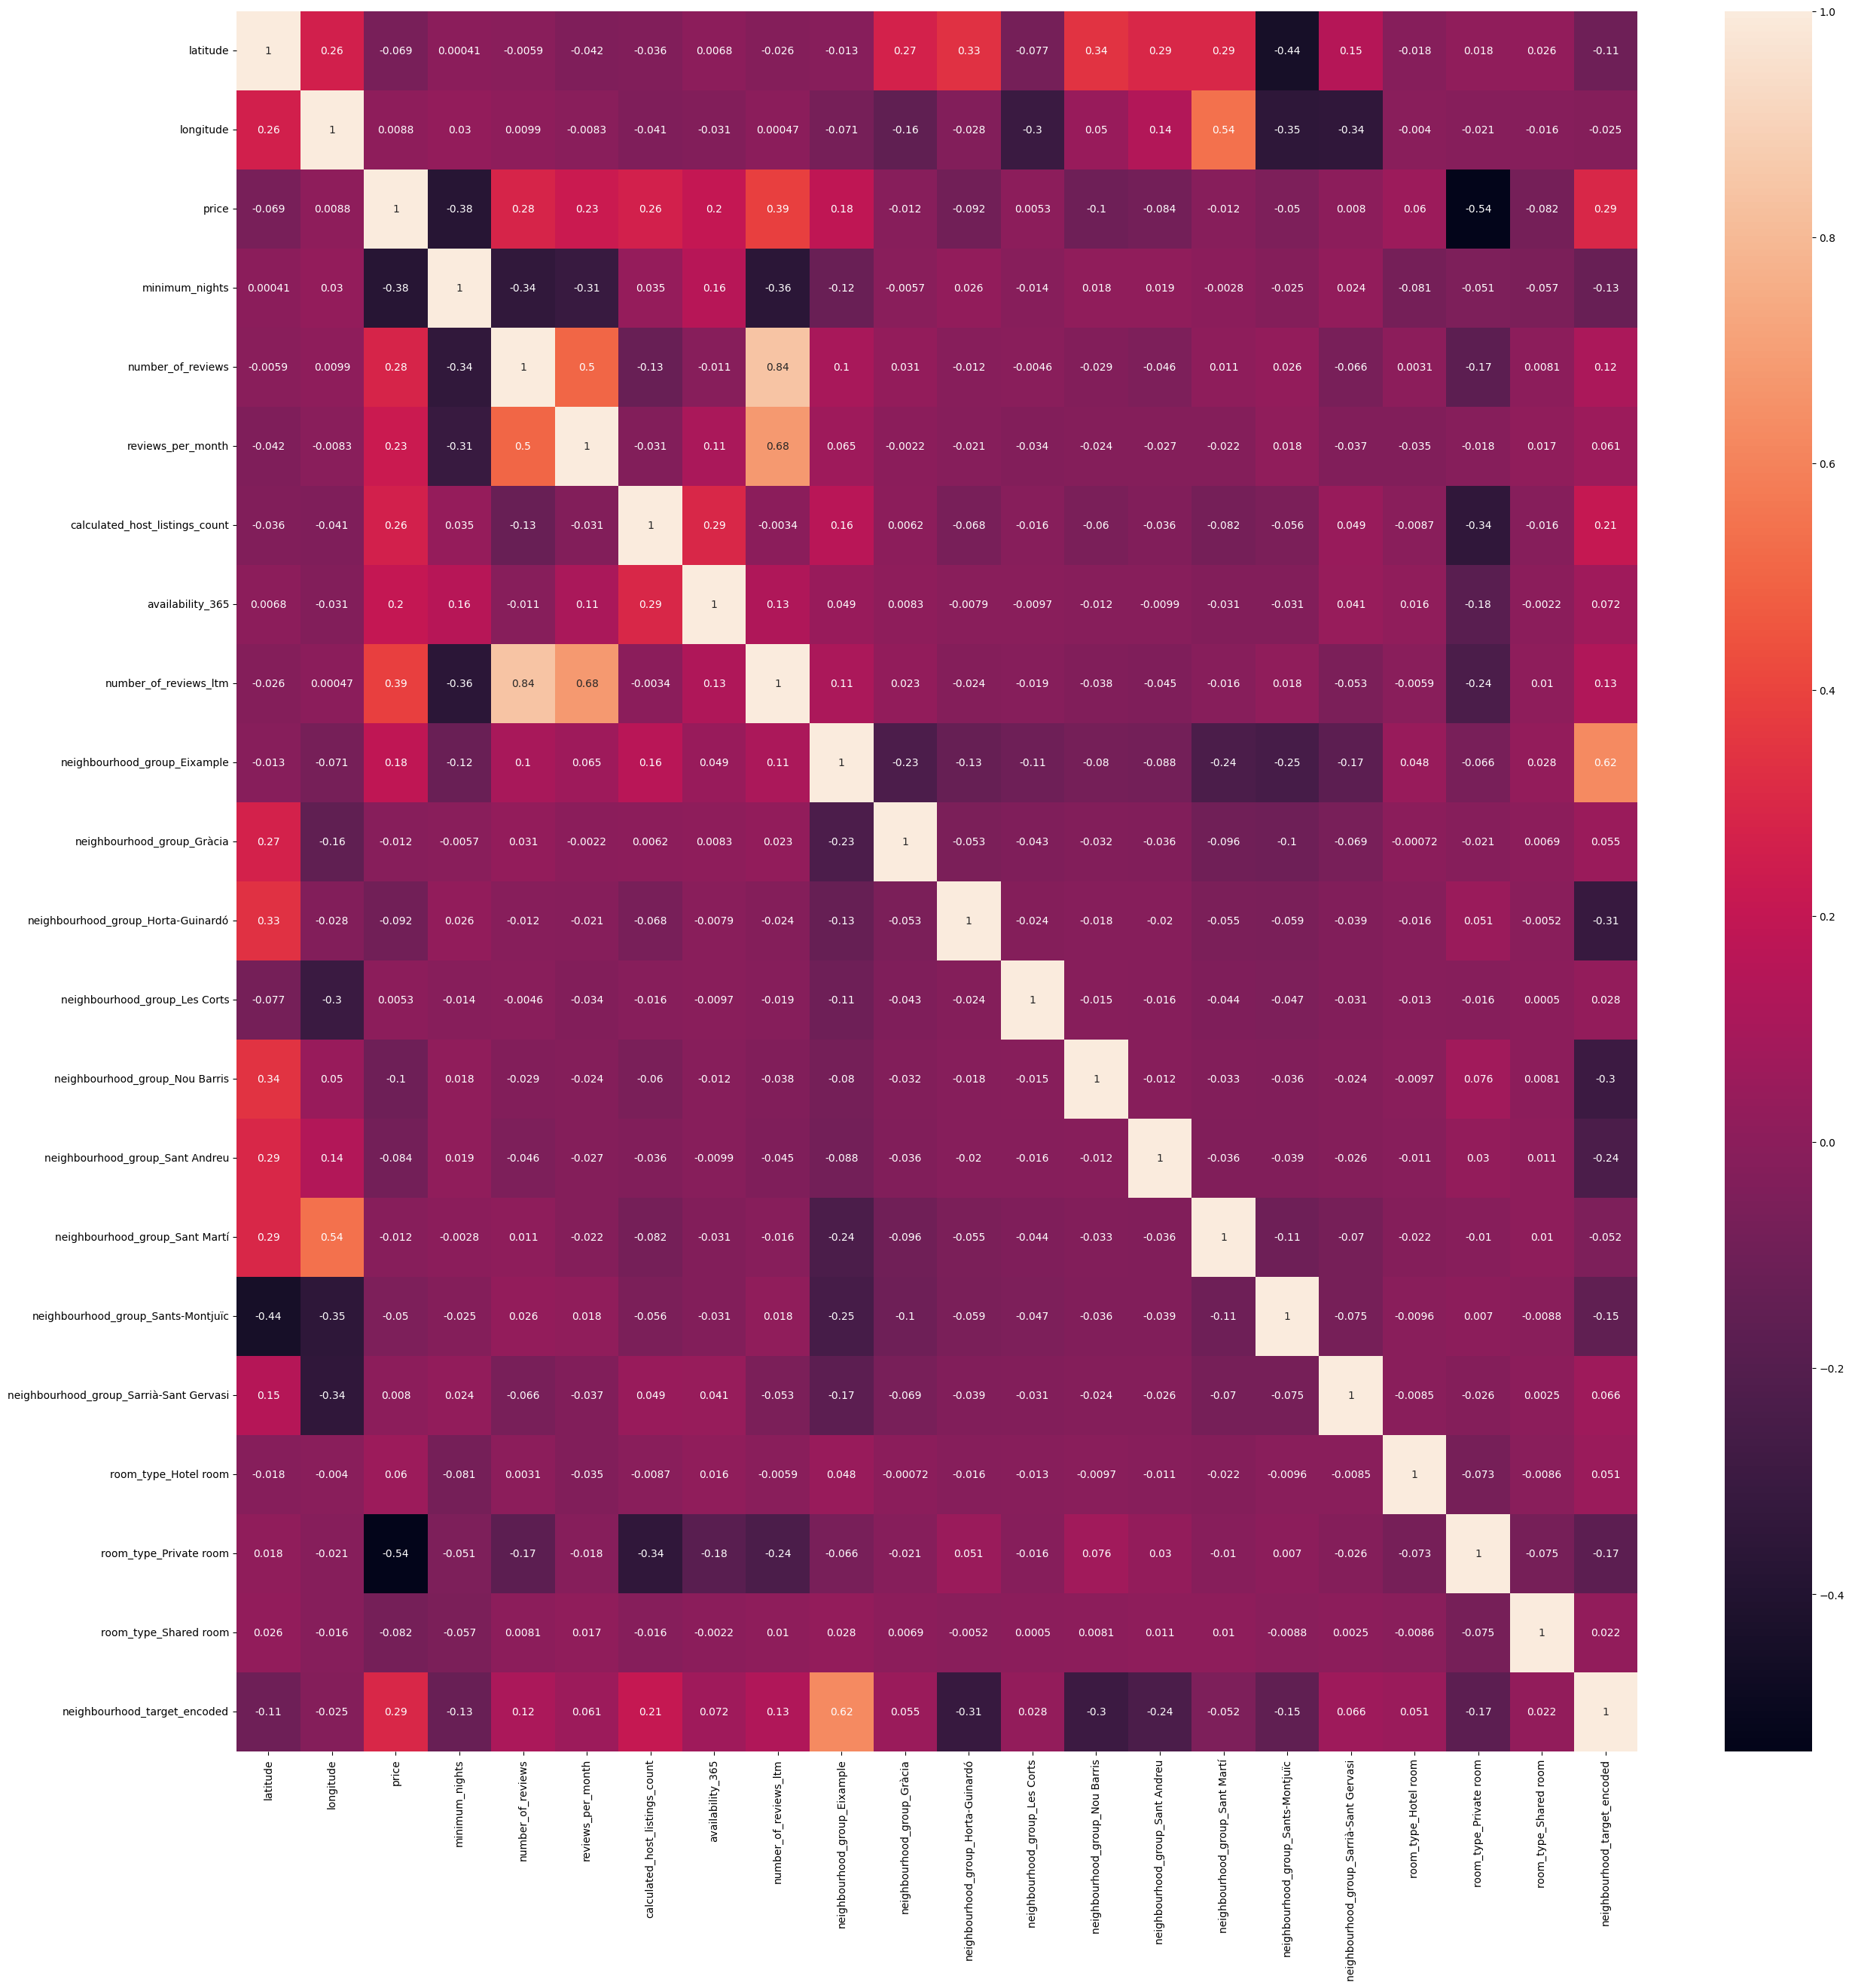

In [37]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot = True)

# Modeling

## Random Forest Regressor

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Define the features and the target variable
X = df.drop("number_of_reviews", axis=1)  # Drop the target column from features
y = df["number_of_reviews"]  # Define the target variable

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [42]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [44]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.29034171092249056
R² Score: 0.9126183743204827


## XGBoost

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and the target variable
X = df.drop("number_of_reviews", axis=1)  # Drop the target column from features
y = df["number_of_reviews"]  # Define the target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.2891730243119106
R² Score: 0.9129701037899339


## LightGBM

In [52]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and the target variable
X = df.drop("number_of_reviews", axis=1)  # Drop the target column from features
y = df["number_of_reviews"]  # Define the target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 13784, number of used features: 21
[LightGBM] [Info] Start training from score 2.260874
Mean Squared Error: 0.2913142189151281
R² Score: 0.9123256870275925


c:\Users\milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


# Save best model (XGboost) in pickle file

In [54]:
import pickle
with open("best_model.pkl" , "wb" )as file:
    pickle.dump(xgb_model,file)

In [73]:
df.head(1)


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_group_Eixample,...,neighbourhood_group_Les Corts,neighbourhood_group_Nou Barris,neighbourhood_group_Sant Andreu,neighbourhood_group_Sant Martí,neighbourhood_group_Sants-Montjuïc,neighbourhood_group_Sarrià-Sant Gervasi,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_target_encoded
0,41.4056,2.1726,5.3519,0.6931,3.5835,0.2546,3.3673,18.0000,2.1972,1,...,0,0,0,0,0,0,0,0,0,5.0626


In [74]:
df.head(1)
df.columns.tolist()

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'neighbourhood_group_Eixample',
 'neighbourhood_group_Gràcia',
 'neighbourhood_group_Horta-Guinardó',
 'neighbourhood_group_Les Corts',
 'neighbourhood_group_Nou Barris',
 'neighbourhood_group_Sant Andreu',
 'neighbourhood_group_Sant Martí',
 'neighbourhood_group_Sants-Montjuïc',
 'neighbourhood_group_Sarrià-Sant Gervasi',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'neighbourhood_target_encoded']

In [72]:
xgb_model.predict([[41.3851,2.1734,100.0,2,10,0.5,5,365,10,1,0,0,0,0,0,0,0,0,1,0,0.5]])

array([6.1372967], dtype=float32)

In [ ]:
# import joblib

# model = joblib.load('best_model.pkl')


In [71]:
import requests

# Define the endpoint URL
url = 'http://127.0.0.1:8000/predict'

# Define the payload
payload ={
    "latitude": 41.3851,
    "longitude": 2.1734,
    "price": 100.0,
    "minimum_nights": 2,
    "reviews_per_month": 0.5,
    "calculated_host_listings_count": 5,
    "availability_365": 365,
    "number_of_reviews_ltm": 10,
    "neighbourhood_group_Eixample": 1,
    "neighbourhood_group_Gràcia": 0,
    "neighbourhood_group_Horta-Guinardó": 0,
    "neighbourhood_group_Les Corts": 0,
    "neighbourhood_group_Nou Barris": 0,
    "neighbourhood_group_Sant Andreu": 0,
    "neighbourhood_group_Sant Martí": 0,
    "neighbourhood_group_Sants-Montjuïc": 0,
    "neighbourhood_group_Sarrià-Sant Gervasi": 0, 
    "room_type_Hotel room": 0,
    "room_type_Private room": 1,
    "room_type_Shared room": 0,
    "neighbourhood_target_encoded": 0.5
}

# Make the POST request
response = requests.post(url, json=payload)

# Print the response
print("Status Code:", response.status_code)
print("Response Body:", response.text)


Status Code: 200
Response Body: {"prediction":[5.479732513427734]}


In [75]:
model_path = 'best_model.xgb'  # Update with the actual path to your saved model
model = xgb.Booster()
model.load_model(model_path)

# Define the input data
input_data = {
    "latitude": 41.3851,
    "longitude": 2.1734,
    "price": 100.0,
    "minimum_nights": 2,
    "reviews_per_month": 0.5,
    "calculated_host_listings_count": 5,
    "availability_365": 365,
    "number_of_reviews_ltm": 10,
    "neighbourhood_group_Eixample": 1,
    "neighbourhood_group_Gràcia": 0,
    "neighbourhood_group_Horta-Guinardó": 0,
    "neighbourhood_group_Les Corts": 0,
    "neighbourhood_group_Nou Barris": 0,
    "neighbourhood_group_Sant Andreu": 0,
    "neighbourhood_group_Sant Martí": 0,
    "neighbourhood_group_Sants-Montjuïc": 0,
    "neighbourhood_group_Sarrià-Sant Gervasi": 0,
    "room_type_Hotel room": 0,
    "room_type_Private room": 1,
    "room_type_Shared room": 0,
    "neighbourhood_target_encoded": 0.5
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Convert DataFrame to DMatrix for prediction
dmatrix = xgb.DMatrix(input_df)

# Make a prediction
prediction = model.predict(dmatrix)

# Print the prediction result
print("Prediction:", prediction)

Prediction: [5.4797325]
